In [1]:
import pandas as pd
from datetime import datetime
from collections import Counter
import numpy as np

import requests
from bs4 import BeautifulSoup
import re

req = requests.get("https://arxiv.org/")
soup = BeautifulSoup(req.text, 'html.parser')
            
data = pd.read_csv('/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/project02/arxiv2705.csv')
# data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Find all <a> tags with href containing "/recent"
recent_links = soup.find_all('a', href=lambda href: href and '/recent' in href)
topics = {}
# Print the links
for link in recent_links:
    # print(link['href'])
    topics[f"https://arxiv.org{link['href']}"] = link.text
    if link.text == 'recent':
        print(link)
print(len(topics))

# topics.keys()
topics_name = {}
for k, v in topics.items():
    if v != 'recent':
        topics_name[k.split('/')[-2]] = v
    else:
        print(k, v)
print(topics_name)
# sorted topics_name by(key, value) in ascending order
topics_name = dict(sorted(topics_name.items(), key=lambda item: (item[0], item[1]) ))

<a aria-labelledby="recent-astro-ph astro-ph" href="/list/astro-ph/recent" id="recent-astro-ph">recent</a>
<a aria-labelledby="recent-cond-mat cond-mat" href="/list/cond-mat/recent" id="recent-cond-mat">recent</a>
<a aria-labelledby="recent-gr-qc gr-qc" href="/list/gr-qc/recent" id="recent-gr-qc">recent</a>
<a aria-labelledby="recent-hep-ex hep-ex" href="/list/hep-ex/recent" id="recent-hep-ex">recent</a>
<a aria-labelledby="recent-hep-lat hep-lat" href="/list/hep-lat/recent" id="recent-hep-lat">recent</a>
<a aria-labelledby="recent-hep-ph hep-ph" href="/list/hep-ph/recent" id="recent-hep-ph">recent</a>
<a aria-labelledby="recent-hep-th hep-th" href="/list/hep-th/recent" id="recent-hep-th">recent</a>
<a aria-labelledby="recent-math-ph math-ph" href="/list/math-ph/recent" id="recent-math-ph">recent</a>
<a aria-labelledby="recent-nlin nlin" href="/list/nlin/recent" id="recent-nlin">recent</a>
<a aria-labelledby="recent-nucl-ex nucl-ex" href="/list/nucl-ex/recent" id="recent-nucl-ex">recen

In [8]:
len(topics_name)

146

In [9]:
data = pd.read_csv('/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/project02/arxiv05_v2.csv')

,Unnamed: 0,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight
0,0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.CL, cs.AI, cs.CV",3,May 03 2024,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417
1,1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,May 03 2024,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437
2,2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.CL, cs.AI, cs.LG",3,May 03 2024,3/5/2024,A Careful Examination of Large Language Model ...,2.827919
3,3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.CL, cs.AI",2,May 03 2024,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944
4,4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.CL, cs.AI, cs.LG",3,May 03 2024,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,Nov 03 2023,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689
49996,49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,Nov 03 2023,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761
49997,49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"stat.ML, cs.LG, 68T05",3,Nov 03 2023,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592
49998,49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.CV, cs.AI, cs.RO",3,Nov 03 2023,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397


In [36]:
# data tags change
data_tags = []
data_tags_count = []

# data['tags']
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    acc_tag = [tag for tag in split_tag if tag in topics_name]
    # get a unique list of tags
    acc_tag = list(set(acc_tag))
    acc_tag_str = ', '.join(tag for tag in acc_tag)
    # print(acc_tag_str)
    if len(acc_tag_str) == 0:
        print(tag_row)
    data_tags.append(acc_tag_str)
    data_tags_count.append(len(acc_tag))

data['tags'] = data_tags
data['tags_count'] = data_tags_count

# new_time = []
# for date_str in data['time']:
#     # Convert to datetime object
#     date_obj = datetime.strptime(date_str, "%b %d %Y")

#     # Convert to desired format
#     formatted_date = date_obj.strftime("%Y-%m-%d")

#     # print(formatted_date)
#     new_time.append(formatted_date)

# data['time'] = new_time

# data = data.drop(columns = ['thumb_url', 'utags'])

data.to_csv('./arxiv05_v2.csv', index=True)


In [13]:
data

,Unnamed: 0,authors,authors_count,id,summary,tags,tags_count,time,date,title,weight
0,0,"Piotr Padlewski, Max Bain, Matthew Henderson, ...",22,2405.02287,We introduce Vibe-Eval: a new open benchmark a...,"cs.CL, cs.AI, cs.CV",3,2024-05-03,3/5/2024,Vibe-Eval: A hard evaluation suite for measuri...,2.823417
1,1,"Wen-Hsuan Chu, Lei Ke, Katerina Fragkiadaki",3,2405.02280,Existing VLMs can track in-the-wild 2D video o...,cs.CV,1,2024-05-03,3/5/2024,DreamScene4D: Dynamic Multi-Object Scene Gener...,2.826437
2,2,"Hugh Zhang, Jeff Da, Dean Lee, Vaughn Robinson...",14,2405.00332,Large language models (LLMs) have achieved imp...,"cs.CL, cs.AI, cs.LG",3,2024-05-03,3/5/2024,A Careful Examination of Large Language Model ...,2.827919
3,3,"Longhui Yu, Weisen Jiang, Han Shi, Jincheng Yu...",10,2309.12284,Large language models (LLMs) have pushed the l...,"cs.CL, cs.AI",2,2024-05-03,3/5/2024,MetaMath: Bootstrap Your Own Mathematical Ques...,2.839944
4,4,"Siddhant Kharbanda, Atmadeep Banerjee, Devaans...",5,2109.07319,Automatic annotation of short-text data to a l...,"cs.CL, cs.AI, cs.LG",3,2024-05-03,3/5/2024,InceptionXML: A Lightweight Framework with Syn...,2.840697
...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,"Junqing Huang, Haihui Wang, Andreas Weiermann,...",4,2311.01984,"In this paper, we derive a novel optimal image...",cs.CV,1,2023-11-03,3/11/2023,Optimal Image Transport on Sparse Dictionaries,184.996689
49996,49996,"Haotian Luo, Kunming Wu, Cheng Dai, Sixian Din...",5,2311.01981,RNN-like language models are getting renewed a...,cs.CL,1,2023-11-03,3/11/2023,ProSG: Using Prompt Synthetic Gradients to All...,184.998761
49997,49997,"Cyrille Kone, Emilie Kaufmann, Laura Richert",3,2307.00424,In this paper we revisit the fixed-confidence ...,"stat.ML, cs.LG",2,2023-11-03,3/11/2023,Adaptive Algorithms for Relaxed Pareto Set Ide...,185.002592
49998,49998,"Julian Moosmann, Pietro Bonazzi, Yawei Li, Siz...",7,2311.01057,Smart glasses are rapidly gaining advanced fun...,"cs.CV, cs.AI, cs.RO",3,2023-11-03,3/11/2023,Ultra-Efficient On-Device Object Detection on ...,185.004397


In [55]:
data = pd.read_csv('./arxiv2705.csv')

In [14]:
data_cat = []
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    data_cat.extend(split_tag)
    
data_cat_dict = Counter(data_cat)
print(len(data_cat_dict))
# data_dict = data_cat_dict

143


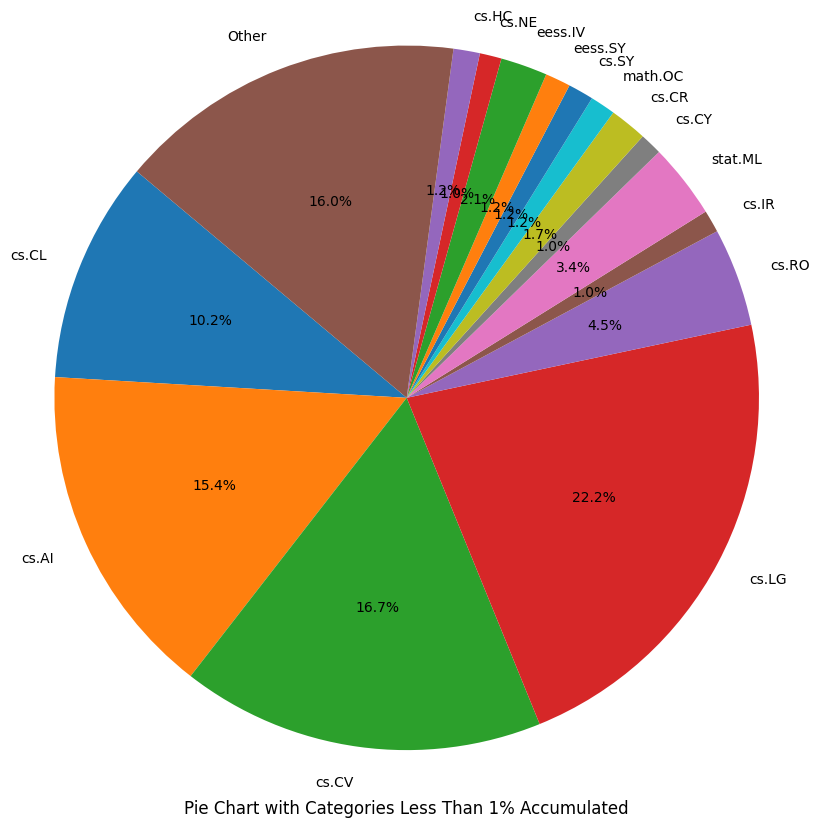

In [18]:
# Calculate total sum of values
total_sum = sum(data_cat_dict.values())

# Separate categories into those above and below 1%
threshold = total_sum * 0.01
above_threshold = {k: v for k, v in data_cat_dict.items() if v >= threshold}
below_threshold = {k: v for k, v in data_cat_dict.items() if v < threshold}

# Sum of values below threshold
other_sum = sum(below_threshold.values())

# Include the "Other" category if there are items below the threshold
if other_sum > 0:
    above_threshold['Other'] = other_sum

# Extracting keys and values for plotting
labels = list(above_threshold.keys())
sizes = list(above_threshold.values())

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Pie Chart with Categories Less Than 1% Accumulated', y=-0.05)

# Display the pie chart
plt.show()

In [21]:
above_threshold.keys()
above_threshold_key = sorted(above_threshold.keys())
above_threshold_key


['Other',
 'cs.AI',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.HC',
 'cs.IR',
 'cs.LG',
 'cs.NE',
 'cs.RO',
 'cs.SY',
 'eess.IV',
 'eess.SY',
 'math.OC',
 'stat.ML']

In [37]:
# cat_keys = sorted(data_cat_dict.keys())

heatmap_cat = np.zeros((len(above_threshold_key), len(above_threshold_key)))
above_threshold_key_list = list(above_threshold.keys())

data_cat = []
for tag_row in data['tags']:
    split_tag = tag_row.split(', ')
    
    # data_cat.extend(split_tag)
    split_tag = [st if st in above_threshold_key else 'Other' for st in split_tag ]
    
    num_tag = len(split_tag)
    for ii in range(num_tag):
        for jj in range(ii + 1, num_tag, 1):
            ic = above_threshold_key_list.index(split_tag[ii])
            jc = above_threshold_key_list.index(split_tag[jj])
            if ic == jc and split_tag[ii] == 'cs.CL':
                print(split_tag)
                # continue
            heatmap_cat[ic][jc] += 1
            heatmap_cat[jc][ic] += 1 
    
# data_cat_dict = Counter(data_cat)
# data_dict = data_cat_dict

In [28]:
topics_name['Other'] = ''

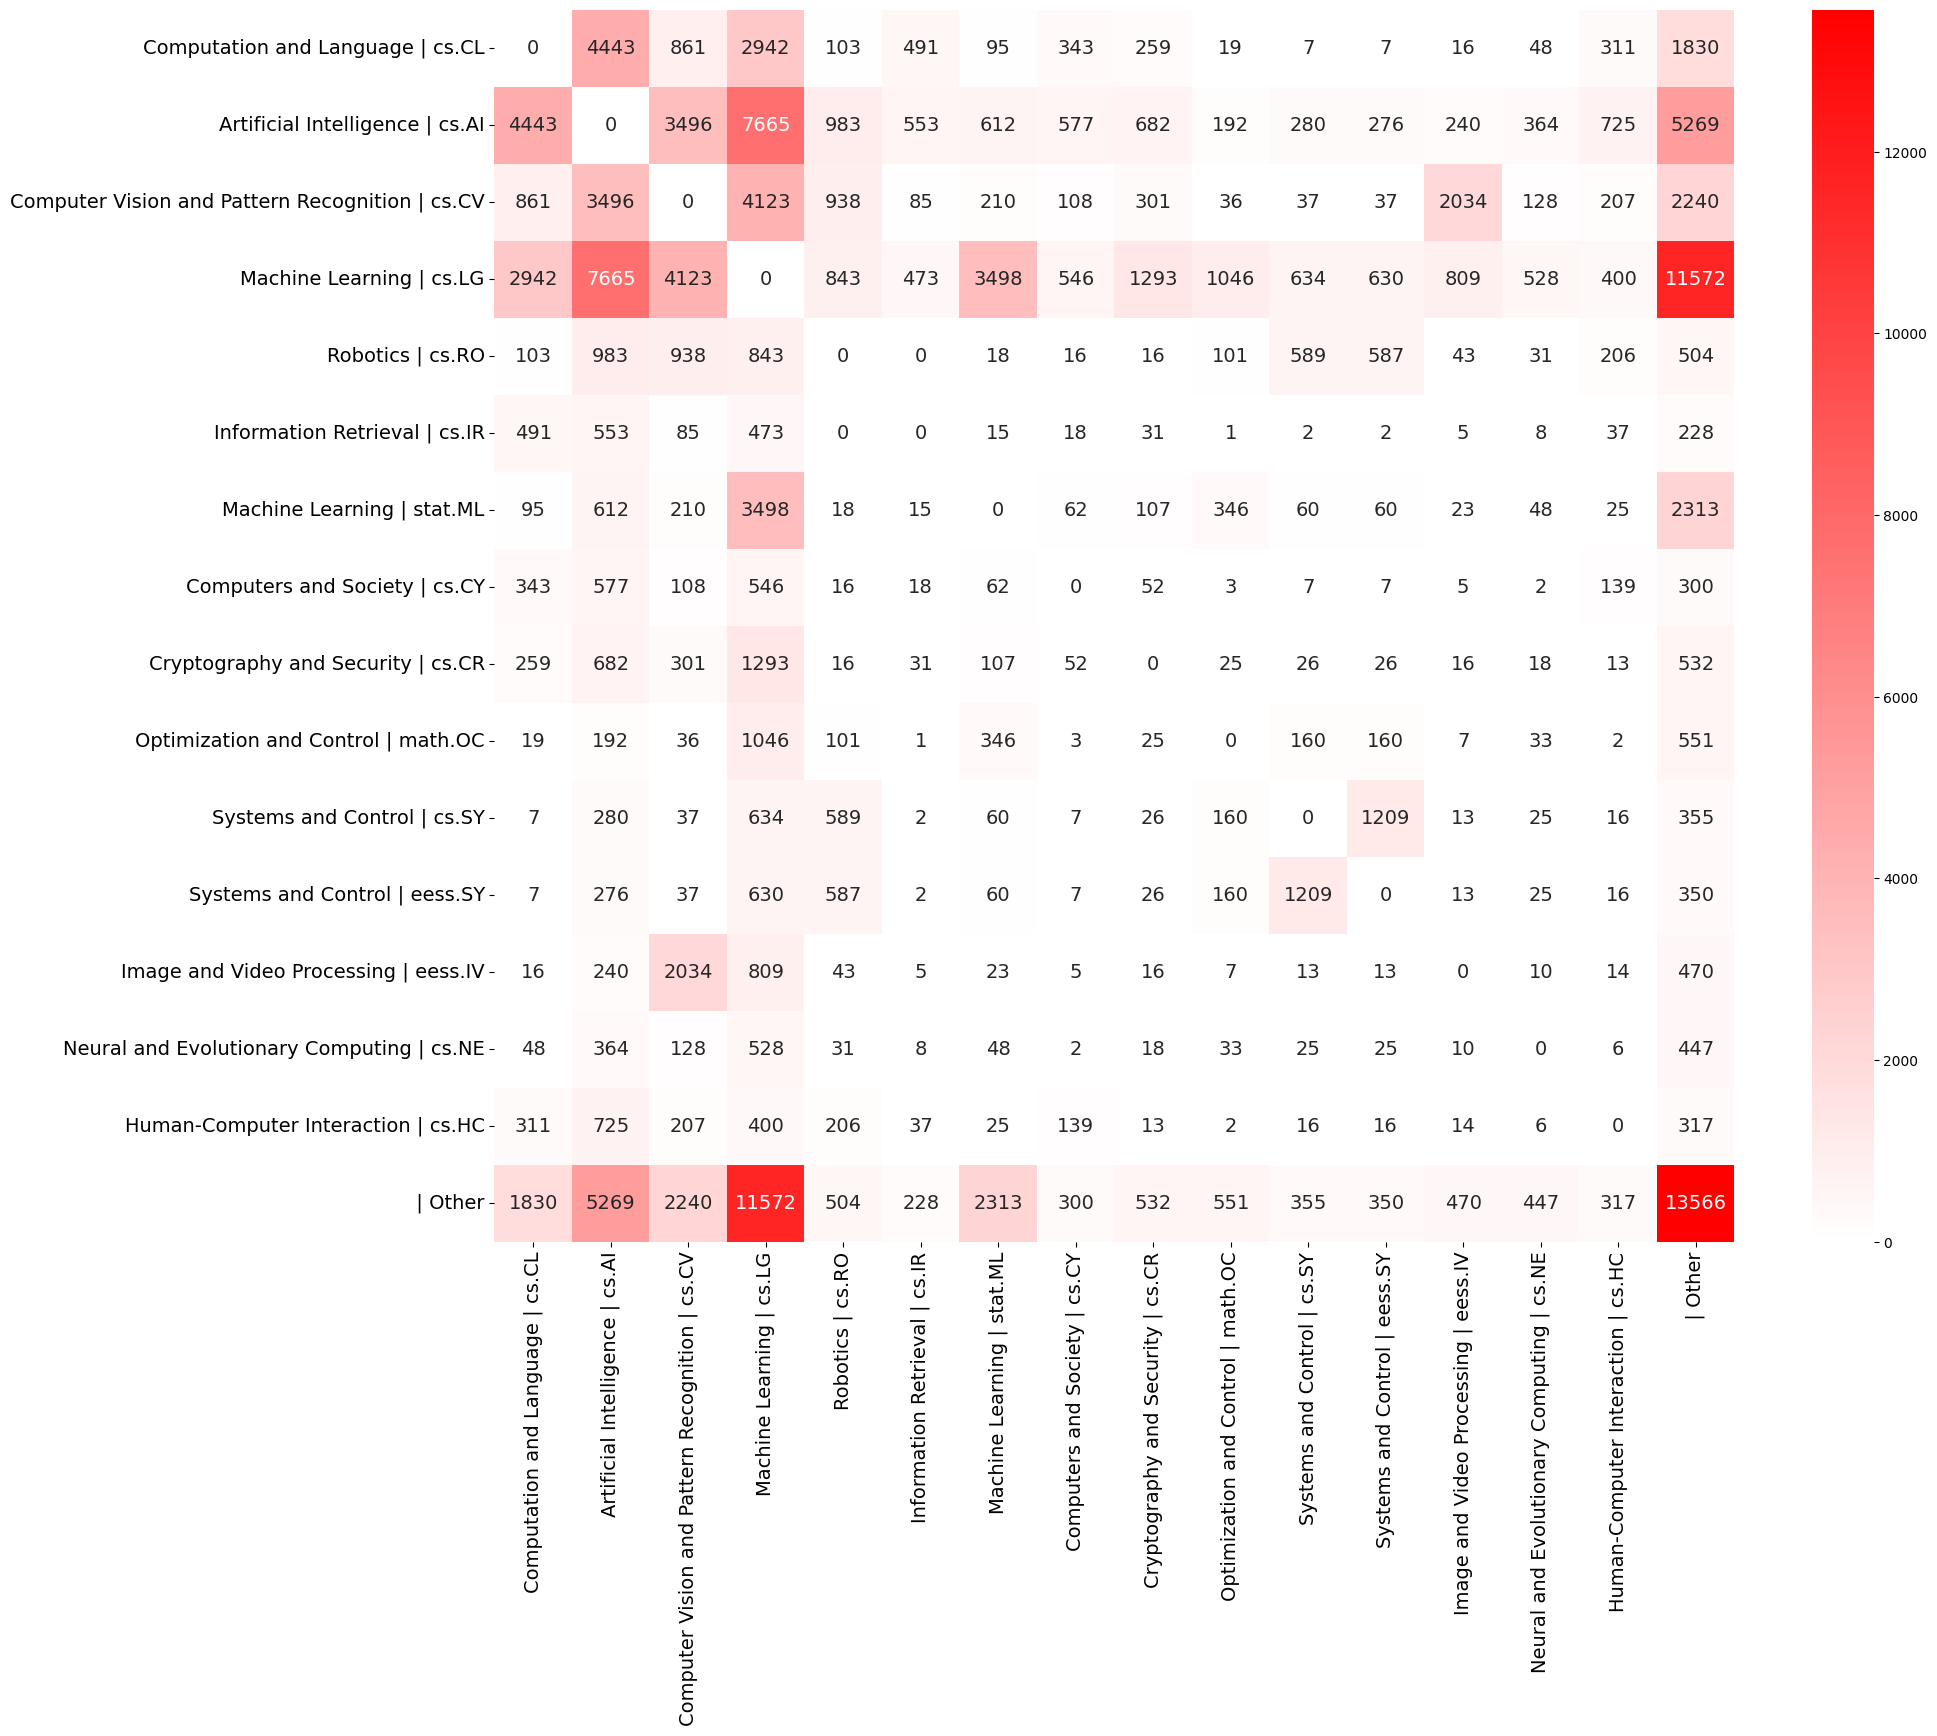

In [38]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap from white to red
N = len(above_threshold_key_list)
colors = [(1, 1, 1), (1, 0, 0)]  # White to Red
cmap_name = 'white_red'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# Create a heatmap using the custom colormap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(heatmap_cat, annot=True, fmt=".0f", cmap=custom_cmap, annot_kws={"fontsize": 14})

plt.xticks(np.arange(N) + 0.5, [ topics_name[f] + " | " + f for f in above_threshold_key_list] , fontsize=14, rotation=90)
plt.yticks(np.arange(N) + 0.5, [ topics_name[f] + " | " + f for f in above_threshold_key_list], fontsize=14. , rotation=0)

# Add color bar
# plt.colorbar(heatmap)

# # Add legend for above_threshold_key_list
# legend_elements = [Patch(facecolor=heatmap.get_cmap()(0.0), edgecolor='w', label=above_threshold_key_list[0]),
#                    Patch(facecolor=heatmap.get_cmap()(1.0), edgecolor='w', label=above_threshold_key_list[-1])]

# plt.legend(handles=legend_elements, loc='upper right', title='Legend')


# Add a title
# plt.title('Heatmap of N x N Matrix')

# Display the heatmap
plt.show()
